# Home Work 1 (72)
## (APANPS5335_002_2023_3 Machine Learning)

## Submitted by: Eli Guo
## UNI: yg2869
### Posted: 9/5/2023 | Due: 9/10/2023 by 11:59 pm

In [1]:
!export PATH=/Library/TeX/texbin:$PATH

The goal of this assignment will to build proficiency in Data analytics and using Jupyter Notebook. You may use R to answer the questions. If you have any trouble, Google probably already has the answer.


__Instructions__: Please submit both the Jupyter notebook file and a PDF version. html is also allowed but PDF is recommended. Make sure to complete the name and UNI in the header of this document.

__Python Resources__: If you want to use Python, the simplest would be to install Anaconda Python distribution. You can download for free from https://www.anaconda.com/products/individual

For help with setting up Anaconda, this is one of many such videos https://www.youtube.com/watch?v=C4OPn58BLaU you will find on YouTube.

The process is the same for Windows and Mac.

In [2]:
# Load necessary libraries

import numpy as np
import pandas as pd

# Load other functions for added functionality

# The following glimpse() function is a replicate of R's glimpse function
# https://gist.github.com/sainathadapa/08c1028c92684fe1ec89ecb5d5629a57

def glimpse(df, maxvals=10, maxlen=110):
    print('Shape: ', df.shape)

    def pad(y):
        max_len = max([len(x) for x in y])
        return [x.ljust(max_len) for x in y]

    # Column Name
    toprnt = pad(df.columns.tolist())

    # Column Type
    toprnt = pad([toprnt[i] + ' ' + str(df.iloc[:,i].dtype) for i in range(df.shape[1])])

    # Num NAs
    num_nas = [df.iloc[:,i].isnull().sum() for i in range(df.shape[1])]
    num_nas_ratio = [int(round(x*100/df.shape[0])) for x in num_nas]
    num_nas_str = [str(x) + ' (' + str(y) + '%)' for x,y in zip(num_nas, num_nas_ratio)]
    max_len = max([len(x) for x in num_nas_str])
    num_nas_str = [x.rjust(max_len) for x in num_nas_str]
    toprnt = [x + ' ' + y + ' NAs' for x,y in zip(toprnt, num_nas_str)]

    # Separator
    toprnt = [x + ' : ' for x in toprnt]

    # Values
    toprnt = [toprnt[i] + ', '.join([str(y) for y in df.iloc[:min([maxvals,df.shape[0]]), i]]) for i in range(df.shape[1])]

    # Trim to maxlen
    toprnt = [x[:min(maxlen, len(x))] for x in toprnt]

    for x in toprnt:
        print(x)


# 1 (3 points)

Install Python, Anaconda or any distribution of your choice. Check the python version. There are varieties of way to do this. One way is to use the `sys` module and sys.version to check the python version.

In [3]:
import sys

def check_version():
    #ToDo
    return sys.version

print(check_version())

3.10.9 (main, Jan 27 2023, 21:02:51) [Clang 14.0.0 (clang-1400.0.29.202)]


# Question 2 (6 points)

Complete the Table with your responses for each of the following questions. Please also submit the responses to this form https://forms.gle/tJvXQw22cVxxFvcs5

In [4]:
# Import pandas library
import pandas as pd
pd.set_option('max_colwidth', 400)

# initialize list of lists
data = [
    ['What was your last degree program (BA, MS, PhD, etc), major, and year?', 'BBA, Accounting and Finance, 2022'],
    ['What is your proficiency in calculus? 1 (poor) - 5 (excellent)', '4'],
    ['What is your proficiency in linear algebra? 1 (poor) - 5 (excellent)', '4' ],
    ['What is your proficiency in probability and statistics? 1 (poor) - 5 (excellent)', '4'],
    ['What is your proficiency in statistical inference (i.e., regression)? 1 (poor) - 5 (excellent)', '4'],
    ['What is your proficiency with Python programming? 1 (poor) - 5 (excellent)', '5'],
    ['TOTAL score (please add up the response scores)', '21']
]


# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Question', 'Your answer'])

# print dataframe.
df

,Question,Your answer
0,"What was your last degree program (BA, MS, PhD, etc), major, and year?","BBA, Accounting and Finance, 2022"
1,What is your proficiency in calculus? 1 (poor) - 5 (excellent),4
2,What is your proficiency in linear algebra? 1 (poor) - 5 (excellent),4
3,What is your proficiency in probability and statistics? 1 (poor) - 5 (excellent),4
4,"What is your proficiency in statistical inference (i.e., regression)? 1 (poor) - 5 (excellent)",4
5,What is your proficiency with Python programming? 1 (poor) - 5 (excellent),5
6,TOTAL score (please add up the response scores),21



# Question 3 (3 points)

Create a function that sums all of the odd numbers from 1 to 100. You can create a function in Python using the following:

In [5]:
x=list(range(1,101))
def odd_sum(x):
    #ToDo
    return sum(i for i in x if i % 2 != 0) 

# Sum all of the odd numbers from 1 to 100
odd_sum(x)

2500

In [6]:
def add_odd_numbers(a, b):
    # ToDo
    return sum(i for i in range(a, b) if i % 2 != 0)

# Sum all of the odd numbers from 1 to 100
add_odd_numbers(1, 101)

2500


# Question 4 (3 points)

Create a function that uses vector operations to add all of the odd numbers from 1 to 100. *Hint: use the modulus operator `%` to determine parity.*

In [7]:
def add_odd_vectorized(a):
    # ToDo
    arr = np.arange(1, a)
    return np.sum(arr[arr % 2 != 0])

# Add all of the odd numbers from 1 to 100
add_odd_vectorized(101)

2500

# Question 5

Load and explore the diabetes data set. The compressed file contains two CSV files you can open with Excel or any text editor. The data set was downloaded from https://archive-beta.ics.uci.edu/ml/datasets/diabetes+130+us+hospitals+for+years+1999+2008


Feel free to visit the link above to find additional information.



## 5.1 (2 point)
Load the data set and print the number of rows. Call the source data as `df_src`

In [8]:
# import zipfile
# !unzip -u "/content/drive/My Drive/Sid_DL_Datasets/diabetes+130-us+hospitals+for+years+1999-2008.zip" -d "/content/drive/My Drive/Sid_DL_Datasets/diabetes"

In [9]:
# ToDo: load the data as df_src
df_src = pd.read_csv('diabetic_data.csv')

In [10]:
print(df_src.shape)
print(df_src.columns)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')



## 5.2 (2 point)

Create a smaller data set and name it `df` with the following columns only

"encounter_id", "patient_nbr", "race", "gender", age",
"weight", "admission_type_id", "discharge_disposition_id",
"A1Cresult", "readmitted"

In [11]:
# ToDo: create the smaller dataset as df
df = df_src[["encounter_id", "patient_nbr", "race", "gender", "age", "weight", "admission_type_id", "discharge_disposition_id", "A1Cresult", "readmitted"]]

In [12]:
glimpse(df)

Shape:  (101766, 10)
encounter_id             int64       0 (0%) NAs : 2278392, 149190, 64410, 500364, 16680, 35754, 55842, 63768, 
patient_nbr              int64       0 (0%) NAs : 8222157, 55629189, 86047875, 82442376, 42519267, 82637451, 8
race                     object      0 (0%) NAs : Caucasian, Caucasian, AfricanAmerican, Caucasian, Caucasian,
gender                   object      0 (0%) NAs : Female, Female, Female, Male, Male, Male, Male, Male, Female
age                      object      0 (0%) NAs : [0-10), [10-20), [20-30), [30-40), [40-50), [50-60), [60-70)
weight                   object      0 (0%) NAs : ?, ?, ?, ?, ?, ?, ?, ?, ?, ?
admission_type_id        int64       0 (0%) NAs : 6, 1, 1, 1, 1, 2, 3, 1, 2, 3
discharge_disposition_id int64       0 (0%) NAs : 25, 1, 1, 1, 1, 1, 1, 1, 1, 3
A1Cresult                object 84748 (83%) NAs : nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
readmitted               object      0 (0%) NAs : NO, >30, NO, NO, NO, >30, NO, >30, NO


## 5.3 (2 + 2 points)

Explore if there is any missing values in any of the columns. A missing value may be just an empty cell, NULL value, a question mark (?) or any other unusual character. Suppose, for this data set, any cell with a question mark is missing. There are other values such as "None" but lets keep them as they are.  

Properly encode each cell with a question mark as missing value(i.e., NA)

Additionally, perform a profile analysis on the newly created data set. A profile analysis may contain

- number of records in the entire data set
- number of complete records for each column in the data set
- rate of missingness in each column
- minimum value in each numeric column
- maximum value in each numeric column

You may use any library/package of your choice.

In [13]:
# Replace all instance of `?` with missing values `np.nan`
df = df.replace('?', np.nan)

In [14]:
# Check if it is working as expected
# Profile analysis

# Number of records in the entire data set
total_records = df.shape[0]

# Number of complete records for each column
complete_records = df.notna().sum()

# Rate of missingness in each column
missingness_rate = df.isna().mean()

# For numeric columns only:
numeric_columns = df.select_dtypes(include='number')

# Minimum value in each numeric column
min_values = numeric_columns.min()

# Maximum value in each numeric column
max_values = numeric_columns.max()

print(f"Number of records in the entire data set: {total_records}")
print(f"\nNumber of complete records for each column in the data set:\n{complete_records}")
print(f"\nRate of missingness in each column:\n{missingness_rate}")
print(f"\nMinimum value in each numeric column:\n{min_values}")
print(f"\nMaximum value in each numeric column:\n{max_values}")

Number of records in the entire data set: 101766

Number of complete records for each column in the data set:
encounter_id                101766
patient_nbr                 101766
race                         99493
gender                      101766
age                         101766
weight                        3197
admission_type_id           101766
discharge_disposition_id    101766
A1Cresult                    17018
readmitted                  101766
dtype: int64

Rate of missingness in each column:
encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
weight                      0.968585
admission_type_id           0.000000
discharge_disposition_id    0.000000
A1Cresult                   0.832773
readmitted                  0.000000
dtype: float64

Minimum value in each numeric column:
encounter_id                12522
patient_nbr                   13


## 5.4 (2 + 2 points)

Notice that the encounter_id and patient_nbr columns are numerical. Update the data set by converting these two columns to character. And perform the profile analysis of the updated data set.

In [15]:
# Convert columns to character
df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_nbr'] = df['patient_nbr'].astype(str)

In [16]:
# Profile analysis

# Number of records in the entire data set
total_records = df.shape[0]

# Number of complete records for each column
complete_records = df.notna().sum()

# Rate of missingness in each column
missingness_rate = df.isna().mean()

# For numeric columns only:
numeric_columns = df.select_dtypes(include='number')

# Minimum value in each numeric column
min_values = numeric_columns.min()

# Maximum value in each numeric column
max_values = numeric_columns.max()

print(f"Number of records in the entire data set: {total_records}")
print(f"\nNumber of complete records for each column in the data set:\n{complete_records}")
print(f"\nRate of missingness in each column:\n{missingness_rate}")
print(f"\nMinimum value in each numeric column:\n{min_values}")
print(f"\nMaximum value in each numeric column:\n{max_values}")

Number of records in the entire data set: 101766

Number of complete records for each column in the data set:
encounter_id                101766
patient_nbr                 101766
race                         99493
gender                      101766
age                         101766
weight                        3197
admission_type_id           101766
discharge_disposition_id    101766
A1Cresult                    17018
readmitted                  101766
dtype: int64

Rate of missingness in each column:
encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
weight                      0.968585
admission_type_id           0.000000
discharge_disposition_id    0.000000
A1Cresult                   0.832773
readmitted                  0.000000
dtype: float64

Minimum value in each numeric column:
admission_type_id           1
discharge_disposition_id    1
dtype:


## 5.5 (2 points)

Notice that there are two columns in the data-- one is `encounter_id` and the other is `patient_nbr`. These are self explanatory. Each patient is identified with with a unique `patient_nbr`. There can be multiple records of a single patient, i.e., the `patient_nbr` may appear multiple times. However, the `encounter_id` should be unique as it represent a specific encouter (visit).

Verify whether the encounter numbers are unique.



In [17]:
# Number of rows in the data
print(df.shape[0])

101766


In [18]:
# Number of unique encounters
print(len(pd.unique(df['encounter_id'])))

101766


In [19]:
# Check of the number of rows is the same as the number of unique encounter_id
# If they are not the same, error will be raised
assert(df.shape[0] == len(pd.unique(df['encounter_id'])))

## 5.6 (2 points)

Count how many distinct (unique) patients are there in the data.

In [20]:
print(len(pd.unique(df['patient_nbr'])))

71518



## 5.7 (4 points)

Create a summary table showing the counts and percentages of encounters by admission type.

You may need to use the `ID_mappings.csv` file to obtain the descriptions of each code.

In [21]:
#!pip install tableone

In [22]:
# For help see https://github.com/tompollard/tableone
from tableone import TableOne

TableOne(df, columns=['admission_type_id'], categorical=['admission_type_id'])


Missing       Overall
n                                         101766
admission_type_id, n (%) 1       0  53990 (53.1)
                         2          18480 (18.2)
                         3          18869 (18.5)
                         4              10 (0.0)
                         5            4785 (4.7)
                         6            5291 (5.2)
                         7              21 (0.0)
                         8             320 (0.3)


## 5.8 (5 points)

Do the admission types differ between genders when it comes to admission at the emergency department?

First, create a summary table showing frequency and percentages of each admission type by gender Then comment on whether there is a gender difference in Emergency admissions.

In [23]:
TableOne(df, columns=['admission_type_id'], categorical=['admission_type_id'], groupby='gender')

Grouped by gender                                                          
                                     Missing       Overall        Female          Male Unknown/Invalid
n                                                   101766         54708         47055               3
admission_type_id, n (%) 1                 0  53990 (53.1)  29448 (53.8)  24540 (52.2)        2 (66.7)
                         2                    18480 (18.2)   9894 (18.1)   8586 (18.2)                
                         3                    18869 (18.5)   9840 (18.0)   9028 (19.2)        1 (33.3)
                         4                        10 (0.0)       3 (0.0)       7 (0.0)                
                         5                      4785 (4.7)    2609 (4.8)    2176 (4.6)                
                         6                      5291 (5.2)    2729 (5.0)    2562 (5.4)                
                         7                        21 (0.0)       9 (0.0)      12 (0.0)                
                         8                       320 (0.3)     176 (0.3)     144 (0.3)

The observed difference in Emergency admissions between females and males is relatively small at 1.6%. While females have a slightly higher percentage of Emergency admissions than males, the difference might not be statistically significant. Therefore, we would need to conduct a statistical test, such as the chi-square test for independence. If the p-value from such a test is below a predetermined significance level (commonly 0.05), then we might conclude that there is a statistically significant gender difference in Emergency admissions.

## 5.9 (2 points)

Using the patients admitted through the emergency only, create a frequency table for encounter volume by age group. The first column should show the age groups, and the other columns should show the frequency and percentages.

In [24]:
# select only admission through Emergency (admission_id = 1)
emergency_df = df[df['admission_type_id'] == 1]

TableOne(emergency_df, columns=['age'], categorical=['age'])

Missing       Overall
n                                   53990
age, n (%) [0-10)         0     105 (0.2)
           [10-20)              442 (0.8)
           [20-30)              941 (1.7)
           [30-40)             2071 (3.8)
           [40-50)             5259 (9.7)
           [50-60)            8907 (16.5)
           [60-70)           11148 (20.6)
           [70-80)           13474 (25.0)
           [80-90)            9878 (18.3)
           [90-100)            1765 (3.3)


## 5.10 (5 points)

Is there any association between admission type and blood glucose level (`A1Cresult`)?

- Consider admission type 1, 2, 3 only
- Exclude the cases where A1C result is not available or `None`

Create two categories for the `A1Cresults` and call it`A1Cresults_coded` as

- None as NA (missing value)
- Norm as "0: Normal",
- ">7" or ">8" as "1: Diabetic"`

To answer this question, create a frequency table showing the `n` and `\%` with admission types in row and glucose level on the column. Comment based on this table. No statistical test is needed.

Please note, since there are multiple rows per patient, a patient may have different A1C results at different encounter. Therefore, we will only consider the highest value (>8 will have highest priority followed by >7, and 'Norm') for each patient.


In [25]:
def prepare_data(df):

    """
    Function to create the working data for this particular problem only
    Returns the prepared data frame
    """
    # ToDo
    # exclude cases with None values for A1Cresults
    df = df[df['A1Cresult'].notna()]

    # keep only admission types 1, 2, 3
    df = df[df['admission_type_id'].isin([1, 2, 3])]

    # Create two categories for glucose levels and assign priority
    def code_A1Cresult(row):
        if row == 'Norm':
            return ("0: Normal", 0)
        elif row == ">7":
            return ("1: Diabetic", 1)
        elif row == ">8":
            return ("1: Diabetic", 2)
        
    df['A1Cresult_coded'], df['priority'] = zip(*df['A1Cresult'].apply(code_A1Cresult))
    
    # Group by patient_nbr and admission_type and keep the record with the max priority for A1Cresult
    idx = df.groupby(['patient_nbr', 'admission_type_id'])['priority'].idxmax()
    df = df.loc[idx]
    
    df.drop(columns=['priority'], inplace=True)
    
    return df


# Execute the function
df_ = prepare_data(df)
df_['A1Cresult_coded'].value_counts()

A1Cresult_coded
1: Diabetic    10055
0: Normal       4384
Name: count, dtype: int64

In [26]:
TableOne(df_, columns=['admission_type_id', 'A1Cresult_coded'], categorical=['A1Cresult_coded'], groupby='admission_type_id', pval=True)

Grouped by admission_type_id                                                             
                                                        Missing       Overall            1            2            3 P-Value
n                                                                       14439         9562         3009         1868        
A1Cresult_coded, n (%) 0: Normal                              0   4384 (30.4)  2927 (30.6)   890 (29.6)   567 (30.4)   0.561
                       1: Diabetic                               10055 (69.6)  6635 (69.4)  2119 (70.4)  1301 (69.6)

In [27]:
# Crosstab with counts for each admission type and glucose level
freq_table = pd.crosstab(index=df_['admission_type_id'], columns=df_['A1Cresult_coded'], margins=True, margins_name="Total")

# Calculate the percentages
percent_table = freq_table.div(freq_table.iloc[:,-1], axis=0) * 100

# Combine both tables for n and %
combined_table = pd.concat([freq_table, percent_table], keys=['n', '%'], axis=1)

print(combined_table)

                          n                             %                   
A1Cresult_coded   0: Normal 1: Diabetic  Total  0: Normal 1: Diabetic  Total
admission_type_id                                                           
1                      2927        6635   9562  30.610751   69.389249  100.0
2                       890        2119   3009  29.577933   70.422067  100.0
3                       567        1301   1868  30.353319   69.646681  100.0
Total                  4384       10055  14439  30.362213   69.637787  100.0


## 5.11 (5 points)

Are there patients admitted through the emergency, having A1C results 8 or more who expired (died)? If so, create a table to show volume and percentage of such patients by gender and age group.

In [28]:
def prepare_data(df):
    # ToDo
    df = df[(df['admission_type_id'] == 1) & 
            (df['A1Cresult'] == '>8') & 
            (df['discharge_disposition_id'].isin([11, 19, 20, 21]))]
    
    return df

In [29]:
# ToDo: Creating the summary table

df_ = prepare_data(df)

TableOne(df_, columns=['gender', 'age'], categorical=['age'], groupby='gender')

Grouped by gender                               
                              Missing    Overall    Female      Male
n                                             38         9        29
age, n (%) [70-80)                  0  10 (26.3)  3 (33.3)  7 (24.1)
           [80-90)                     10 (26.3)  5 (55.6)  5 (17.2)
           [90-100)                      2 (5.3)  1 (11.1)   1 (3.4)
           [20-30)                       1 (2.6)             1 (3.4)
           [40-50)                      4 (10.5)            4 (13.8)
           [50-60)                      4 (10.5)            4 (13.8)
           [60-70)                      7 (18.4)            7 (24.1)

## 5.12 (5)

Are there patients admitted through the emergency, having A1C results 8 or more who were readmitted within 30 days? If so, create a table by age-group and gender and show volume and percentage of such patients.

In [30]:
def prepare_data(df):
    # ToDo
    df = df[(df['admission_type_id'] == 1) & 
                     (df['A1Cresult'] == '>8') & 
                     (df['readmitted'] == '<30')]
    return df

df_ = prepare_data(df)

df_.shape

(505, 10)

In [31]:
# Creating the summary table
TableOne(df_, columns=['gender', 'age'], categorical=['age'], groupby='gender')

Grouped by gender                                  
                              Missing     Overall     Female       Male
n                                             505        267        238
age, n (%) [10-20)                  0     6 (1.2)    4 (1.5)    2 (0.8)
           [20-30)                       18 (3.6)   12 (4.5)    6 (2.5)
           [30-40)                       41 (8.1)   24 (9.0)   17 (7.1)
           [40-50)                      84 (16.6)  38 (14.2)  46 (19.3)
           [50-60)                      90 (17.8)  51 (19.1)  39 (16.4)
           [60-70)                     103 (20.4)  50 (18.7)  53 (22.3)
           [70-80)                     118 (23.4)  58 (21.7)  60 (25.2)
           [80-90)                       35 (6.9)   24 (9.0)   11 (4.6)
           [90-100)                       9 (1.8)    6 (2.2)    3 (1.3)
           [0-10)                         1 (0.2)               1 (0.4)


# 6 (3 points)

Create a function in Python to compute the cross entropy between the predicted and the observed distributions of a discrete random variable. Remember, the cross entropy between the predicted distribution ($q$) and the observed distribution ($p$) is defined as:

$H(p, q) = -\sum_{x} p(x) \log q(x)$

In [32]:
import math

def cross_entropy(p, q):
    # ToDo
    return -sum([p[i] * math.log(q[i]) for i in range(len(p))])

print(cross_entropy([0.1, 0.2, 0.1, 0.7], [0.05, 0.25, 0.15, 0.65]))

1.0680921393326832



# 7 (12 points)

Solve each part of Question 9, section 2.4 from An Introduction to Statistical Learning - Python (Link to Ebook: https://hastie.su.domains/ISLP/ISLP_website.pdf)

Auto Dataset for the question can be found in resources here: https://www.statlearning.com/resources-python

Each part (a), (b), (c), (d), (e), (f) is 2 points each

In [33]:
#ToDo: Answer for part (a)

# Load the dataset
df = pd.read_csv('Auto.csv')

# Display column data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
None


Quantitative predictors: "mpg", "cylinders", "displacement", "weight", "acceleration", "year", "origin"  
Qualitative predictors: "horsepower", "name"

In [34]:
#ToDo: Answer for part (b)
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in quantitative_columns:
    print(f"{column}: min={df[column].min()}, max={df[column].max()}")

mpg: min=9.0, max=46.6
cylinders: min=3, max=8
displacement: min=68.0, max=455.0
weight: min=1613, max=5140
acceleration: min=8.0, max=24.8
year: min=70, max=82
origin: min=1, max=3


In [35]:
#ToDo: Answer for part (c)
for column in quantitative_columns:
    mean_val = np.mean(df[column])
    std_dev = np.std(df[column])
    print(f"{column}: mean={mean_val}, standard deviation={std_dev}")

mpg: mean=23.51586901763224, standard deviation=7.815941538224256
cylinders: mean=5.458438287153652, standard deviation=1.6994325855091355
displacement: mean=193.53274559193954, standard deviation=104.24803997948834
weight: mean=2970.2619647355164, standard deviation=846.8355568478047
acceleration: mean=15.55566750629723, standard deviation=2.746529639056109
year: mean=75.99496221662469, standard deviation=3.6853546098832237
origin: mean=1.5743073047858942, standard deviation=0.801538090863641


In [36]:
#ToDo: Answer for part (d)

# Removing the 10th through 85th observations
subset_df = df.drop(df.index[9:85])

for column in quantitative_columns:
    column_data = subset_df[column].values  # Convert the pandas Series to a numpy array
    min_val = np.min(column_data)
    max_val = np.max(column_data)
    mean_val = np.mean(column_data)
    std_dev = np.std(column_data)
    print(f"{column}: min={min_val}, max={max_val}, mean={mean_val}, standard deviation={std_dev}")

mpg: min=11.0, max=46.6, mean=24.438629283489096, standard deviation=7.895856596479212
cylinders: min=3, max=8, mean=5.370716510903427, standard deviation=1.650908119022148
displacement: min=68.0, max=455.0, mean=187.04984423676012, standard deviation=99.48006895812564
weight: min=1649, max=4997, mean=2933.96261682243, standard deviation=809.3792697745698
acceleration: min=8.5, max=24.8, mean=15.723052959501558, standard deviation=2.676335319376774
year: min=70, max=82, mean=77.15264797507788, standard deviation=3.106379853135528
origin: min=1, max=3, mean=1.5981308411214954, standard deviation=0.814890391698078


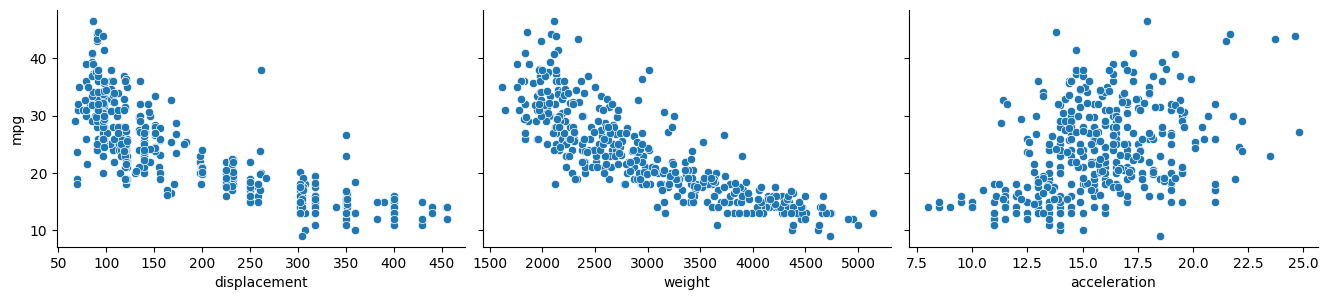

In [37]:
#ToDo: Answer for part (e)

import seaborn as sns
import matplotlib.pyplot as plt

continuous_vars = ['displacement', 'weight', 'acceleration']

# Create the pairplot
sns.pairplot(df, x_vars=continuous_vars, y_vars=['mpg'], height=3, aspect=1.5)
plt.show()

I plotted scatterplots focusing on mpg against displacement, weight, and acceleration to explore which continuous variables could be potential predictors for mpg. The plots revealed a negative correlation between mpg and both displacement and weight. However, there's a positive correlation between mpg and acceleration. This means that larger engine sizes and heavier cars tend to reduce fuel efficiency, while faster-accelerating cars seem to be more fuel-efficient.

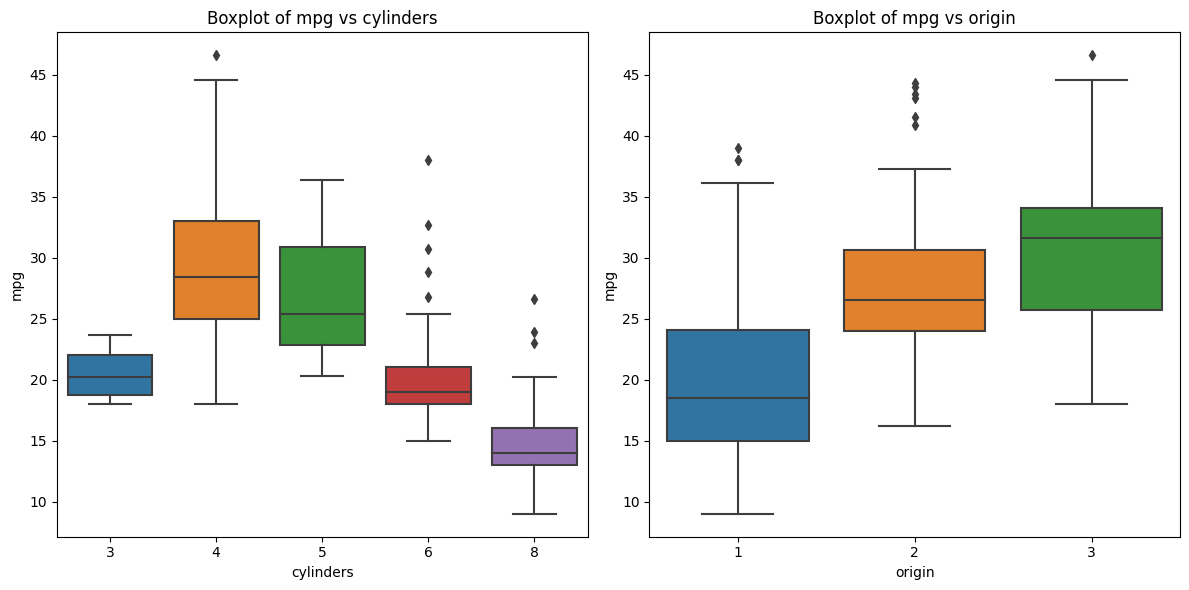

In [38]:
# Create a 1x2 grid for plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for mpg vs cylinders
sns.boxplot(x='cylinders', y='mpg', data=df, ax=axes[0])
axes[0].set_title('Boxplot of mpg vs cylinders')

# Boxplot for mpg vs origin
sns.boxplot(x='origin', y='mpg', data=df, ax=axes[1])
axes[1].set_title('Boxplot of mpg vs origin')

plt.tight_layout()
plt.show()

I also plotted boxplots of mpg against cylinders and origin to explore which categorical variable could be potential predictors for mpg. 

According to the boxplot of mpg vs. cylinder, vehicles with 4 cylinders have the highest median mpg, suggesting they are the most fuel-efficient in this dataset. This is followed by vehicles with 5 cylinders, then 3 cylinders. On the lower end of the fuel efficiency scale are vehicles with 6 and 8 cylinders, with 8-cylinder vehicles having the lowest median mpg. This implies that as the number of cylinders increases (beyond 4 cylinders), fuel efficiency tends to decrease.

The boxplot of mpg vs. origin reveals that mpg increases as origin shifts from 1 to 3.

In summary, the number of cylinders a vehicle has and its origin are both significant indicators of its fuel efficiency. Generally, vehicles with fewer cylinders and those from origin 3 tend to be more fuel-efficient.

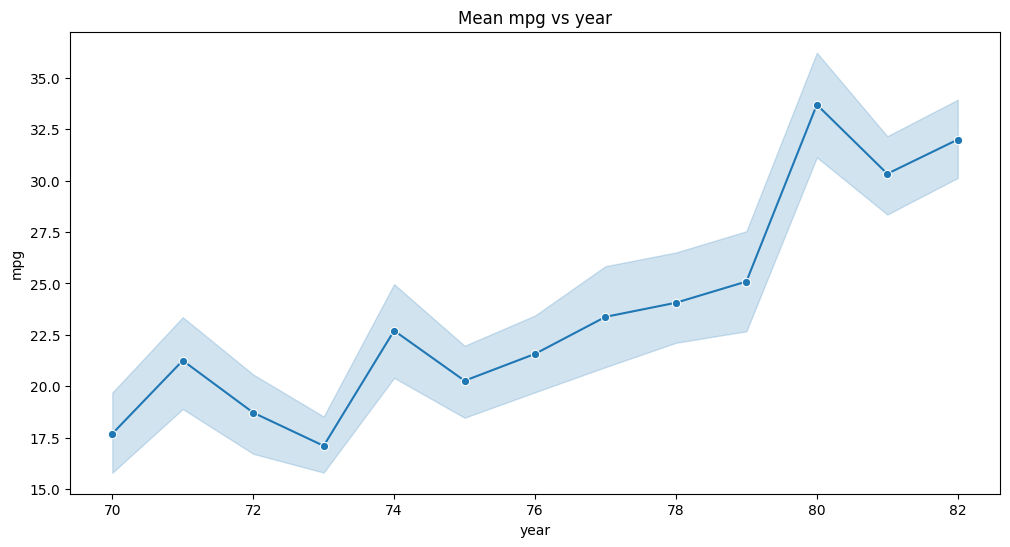

In [39]:
# Line plot for mpg vs year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mpg', data=df, marker='o')
plt.title('Mean mpg vs year')
plt.show()

I also plotted the trend of mpg over the years. Despite occasional sharp increases or decreases in individual years, there's a steady overall ascent in mpg as years progress, indicating continuous improvements in fuel efficiency over time.

In [40]:
#ToDo: Answer for part (f)


Based on the above plots and analysis conducted, it's evident that both continuous and categorical predictors exhibit significant relationships with gas mileage (mpg). 

Starting with the continuous predictors: "displacement" and "weight" both manifest negative correlations with mpg, meaning as these values increase, fuel efficiency typically decreases. Conversely, "acceleration" reveals a positive correlation, suggesting vehicles with quicker acceleration tend to be more fuel-efficient. 

As for categorical predictors, the number of cylinders in a vehicle plays a distinct role in influencing mpg, with 4-cylinder vehicles being notably more fuel-efficient. The "origin" of vehicles further consolidates this pattern, with vehicles from origin 3 generally outperforming those from the other origins in terms of fuel efficiency. 

Lastly, the progressive trend observed across years signifies that the "year" of manufacture can't be overlooked as a predictor, with newer models typically boasting better fuel efficiency. 

It is also noteworthy to mention that although "horsepower" is classified as a qualitative variable (string) in the dataset, it has the potential to be transformed into a numerical variable, subsequently becoming a potent predictor for mpg. 